### **Pilot ELO ratings for AFL 2021 season**

**Eighteen teams each start with 1500 points**

Method for basic (initial) version:

1. Start with 1500 points for all teams
2. The pre-season/starting E value (or win probability) equals 0.5 for all teams
3. After Round 1 results, re-rate each team with using the 'new rating' formula: New Rating = old rating + K(1 - win prob) if they won,or New Rating = old rating + K(0 - win prob) if they lost ::note that K = 20
4. For the 2nd round, matchups decide the new win probabilities which then provide predictions for each game. Use the win probability formula: the inverse of 1 + {10 to the power of [(opposing team rating - team rating divided) by 400]}
5. Repeat

*Note: Additional features to be included in subsequent versions will include home/away advantage or disadvantage to modify win probabilities, and season starting points to reflect previous season's standings.*

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
team = ['ADL','BRI','CAR','COL','ESS','FRE','GEE','GCS','GWS','HAW','MEL','NME','PAD','RIC','STK','SYD','WBD','WCE']
rframe = pd.DataFrame(team)
rframe.head()

,0
0,ADL
1,BRI
2,CAR
3,COL
4,ESS


In [3]:
rframe['seq'] = rframe.index + 1
rframe['win_prob_w1'] = 0.5
rframe['rating_w_zero'] = 1500
rframe

,0,seq,win_prob_w1,rating_w_zero
0,ADL,1,0.5,1500
1,BRI,2,0.5,1500
2,CAR,3,0.5,1500
3,COL,4,0.5,1500
4,ESS,5,0.5,1500
5,FRE,6,0.5,1500
6,GEE,7,0.5,1500
7,GCS,8,0.5,1500
8,GWS,9,0.5,1500
9,HAW,10,0.5,1500


The results of week 1 games will create new ratings (rating_week_1) from which win probabilities for week two contests will be calculated.

In [4]:
# These were the Week 1 results in the order of teams above:
rframe['result_w1'] = [1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1]
rframe.head(10)

,0,seq,win_prob_w1,rating_w_zero,result_w1
0,ADL,1,0.5,1500,1
1,BRI,2,0.5,1500,0
2,CAR,3,0.5,1500,0
3,COL,4,0.5,1500,0
4,ESS,5,0.5,1500,0
5,FRE,6,0.5,1500,0
6,GEE,7,0.5,1500,0
7,GCS,8,0.5,1500,0
8,GWS,9,0.5,1500,0
9,HAW,10,0.5,1500,1


Calculation of the new ratings usus this formula:  
df['new_rating'] = df['rate'] + (20*(df['res'] - df['win_prob']))


In [5]:
rframe['rating_w_1'] = rframe['rating_w_zero'] + (20*(rframe['result_w1'] - rframe['win_prob_w1']))
rframe

,0,seq,win_prob_w1,rating_w_zero,result_w1,rating_w_1
0,ADL,1,0.5,1500,1,1510.0
1,BRI,2,0.5,1500,0,1490.0
2,CAR,3,0.5,1500,0,1490.0
3,COL,4,0.5,1500,0,1490.0
4,ESS,5,0.5,1500,0,1490.0
5,FRE,6,0.5,1500,0,1490.0
6,GEE,7,0.5,1500,0,1490.0
7,GCS,8,0.5,1500,0,1490.0
8,GWS,9,0.5,1500,0,1490.0
9,HAW,10,0.5,1500,1,1510.0


The next (Round 2) matchups are modelled as binary columns with 1 in competing team's positions, 0 in all other positions.
  

The R2 working data frame includes all of the columns from the previous summary df plus binary columns for R2 matchups:

In [6]:
contests_w2 = rframe
# For Carlton (CAR[3]) v Collingwood (COL[4]):
contests_w2['G1'] = np.where((contests_w2['seq'] == 3) |(contests_w2['seq'] == 4),1,0)

# For Geelong (GEE[7]) v Brisbane (BRI[2]):
contests_w2['G2'] = np.where((contests_w2['seq'] == 7) |(contests_w2['seq'] == 2),1,0)

# For Sydney (SYD[16]) v Adelaide (ADL[1]):
contests_w2['G3'] = np.where((contests_w2['seq'] == 16) |(contests_w2['seq'] == 1),1,0)

# For Port Adelaide (PAD[13]) v Essendon (ESS[5]):
contests_w2['G4'] = np.where((contests_w2['seq'] == 13) |(contests_w2['seq'] == 5),1,0)

# For StKilda (STK[15]) v Melbourne (MEL[11]):
contests_w2['G5'] = np.where((contests_w2['seq'] == 15) |(contests_w2['seq'] == 11),1,0)

# For Gold Coast (GLD[8]) v North Melbourne (NME[12]):
contests_w2['G6'] = np.where((contests_w2['seq'] == 8) |(contests_w2['seq'] == 12),1,0)

# For Hawthorn (HAW[10]) v Richmond (RIC[14]):
contests_w2['G7'] = np.where((contests_w2['seq'] == 10) |(contests_w2['seq'] == 14),1,0)

# For Western Bulldogs (WBD[17]) v West Coast (WCE[18]):
contests_w2['G8'] = np.where((contests_w2['seq'] == 17) |(contests_w2['seq'] == 18),1,0)

# For Fremantle (FRE[6]) v GWS (GWS[9]):
contests_w2['G9'] = np.where((contests_w2['seq'] == 6) |(contests_w2['seq'] == 9),1,0)

# Confirm all 18 positions have exactly one location:

col_list = ['G1','G2','G3','G4','G5','G6','G7','G8','G9']
contests_w2['sum_check'] = contests_w2[col_list].sum(axis=1)
contests_w2['sum_check']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
Name: sum_check, dtype: int64

In [7]:
contests_w2

,0,seq,win_prob_w1,rating_w_zero,result_w1,rating_w_1,G1,G2,G3,G4,G5,G6,G7,G8,G9,sum_check
0,ADL,1,0.5,1500,1,1510.0,0,0,1,0,0,0,0,0,0,1
1,BRI,2,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,1
2,CAR,3,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,1
3,COL,4,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,1
4,ESS,5,0.5,1500,0,1490.0,0,0,0,1,0,0,0,0,0,1
5,FRE,6,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,1
6,GEE,7,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,1
7,GCS,8,0.5,1500,0,1490.0,0,0,0,0,0,1,0,0,0,1
8,GWS,9,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,1
9,HAW,10,0.5,1500,1,1510.0,0,0,0,0,0,0,1,0,0,1


In [8]:
contests_w2 = contests_w2.drop(['sum_check'], axis = 1)

### Calculating the win probabilities

Next, the win probabilities formula will be applied for all R2 games.

The expected outcome for both competing teams should be a fraction between 0 and 1. These translate into the probabilities of winning, which should sum to 1 for each contest. A draw outcome isn't consideed here, as in Australian Rules draws only occur about 1% of the time.

From Wikipedia https://en.wikipedia.org/wiki/Elo_rating_system

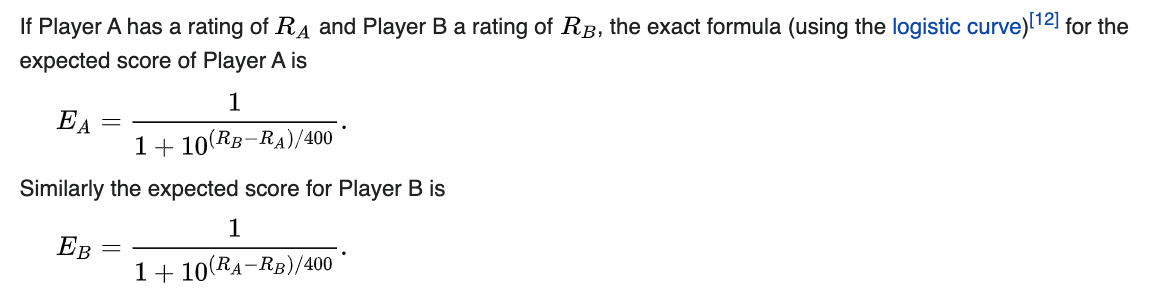

In [9]:
# Create opposition team rating column for R2:
contests_w2['opp_team'] = ['SYD','GEE','CAR','COL','PAD','GWS','BRI','NME','FRE','RIC','STK','GCS','ESS','HAW','MEL','ADL','WCE','WBD']
contests_w2

,0,seq,win_prob_w1,rating_w_zero,result_w1,rating_w_1,G1,G2,G3,G4,G5,G6,G7,G8,G9,opp_team
0,ADL,1,0.5,1500,1,1510.0,0,0,1,0,0,0,0,0,0,SYD
1,BRI,2,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,GEE
2,CAR,3,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,CAR
3,COL,4,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,COL
4,ESS,5,0.5,1500,0,1490.0,0,0,0,1,0,0,0,0,0,PAD
5,FRE,6,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,GWS
6,GEE,7,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,BRI
7,GCS,8,0.5,1500,0,1490.0,0,0,0,0,0,1,0,0,0,NME
8,GWS,9,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,FRE
9,HAW,10,0.5,1500,1,1510.0,0,0,0,0,0,0,1,0,0,RIC


In [10]:
contests_w2.columns = ['team','seq','win_prob_w1','rating_w_zero','result_w1','rating_w_1','G1','G2','G3','G4','G5','G6','G7','G8','G9','opp_team']

In [11]:
# create concise lookup table which is a subset of contests_w2:
lookup_vals_w2 = contests_w2[['team','rating_w_1']]
lookup_vals_w2.columns = ['opp_team','rating_w1_opp']
lookup_vals_w2.head()

,opp_team,rating_w1_opp
0,ADL,1510.0
1,BRI,1490.0
2,CAR,1490.0
3,COL,1490.0
4,ESS,1490.0


In [12]:
w2_joined = pd.merge(contests_w2, 
                      lookup_vals_w2, 
                      on ='opp_team', 
                      how ='left')

In [13]:
w2_joined

,team,seq,win_prob_w1,rating_w_zero,result_w1,rating_w_1,G1,G2,G3,G4,G5,G6,G7,G8,G9,opp_team,rating_w1_opp
0,ADL,1,0.5,1500,1,1510.0,0,0,1,0,0,0,0,0,0,SYD,1510.0
1,BRI,2,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,GEE,1490.0
2,CAR,3,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,CAR,1490.0
3,COL,4,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,COL,1490.0
4,ESS,5,0.5,1500,0,1490.0,0,0,0,1,0,0,0,0,0,PAD,1510.0
5,FRE,6,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,GWS,1490.0
6,GEE,7,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,BRI,1490.0
7,GCS,8,0.5,1500,0,1490.0,0,0,0,0,0,1,0,0,0,NME,1490.0
8,GWS,9,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,FRE,1490.0
9,HAW,10,0.5,1500,1,1510.0,0,0,0,0,0,0,1,0,0,RIC,1510.0


In [14]:
## Now the formula can be applied row by row:
w2_joined['win_prob_w2'] = 1/(1 + (10**((w2_joined['rating_w1_opp']-w2_joined['rating_w_1'])/400)))

In [15]:
w2_joined

,team,seq,win_prob_w1,rating_w_zero,result_w1,rating_w_1,G1,G2,G3,G4,G5,G6,G7,G8,G9,opp_team,rating_w1_opp,win_prob_w2
0,ADL,1,0.5,1500,1,1510.0,0,0,1,0,0,0,0,0,0,SYD,1510.0,0.500000
1,BRI,2,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,GEE,1490.0,0.500000
2,CAR,3,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,CAR,1490.0,0.500000
3,COL,4,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,COL,1490.0,0.500000
4,ESS,5,0.5,1500,0,1490.0,0,0,0,1,0,0,0,0,0,PAD,1510.0,0.471249
5,FRE,6,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,GWS,1490.0,0.500000
6,GEE,7,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,BRI,1490.0,0.500000
7,GCS,8,0.5,1500,0,1490.0,0,0,0,0,0,1,0,0,0,NME,1490.0,0.500000
8,GWS,9,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,FRE,1490.0,0.500000
9,HAW,10,0.5,1500,1,1510.0,0,0,0,0,0,0,1,0,0,RIC,1510.0,0.500000


Only 1 game in W2 is between 'unbalanced' teams, a R1 winner v R1 loser namely Port Adelaide v Essendon. All others are between 2 winners or two losers.

Next, we can create the next version of rframe (need to calculate new ratings for each team first), which contains just these colums: team seq, win_prob_w2, rating_w1, result_w2, rating_w2.

Already have all these, except for the last two: result_w2 and rating_w2

1. Extract the columns we already know, from w2_joined:

In [16]:
rframe_2 = w2_joined[['team','seq','win_prob_w2','rating_w_1']]

2. Add the results for R2:

In [17]:
rframe_2['result_w2'] = [0,0,0,1,0,1,1,1,0,0,1,0,1,1,0,1,1,0]

In [18]:
rframe_2

,team,seq,win_prob_w2,rating_w_1,result_w2
0,ADL,1,0.500000,1510.0,0
1,BRI,2,0.500000,1490.0,0
2,CAR,3,0.500000,1490.0,0
3,COL,4,0.500000,1490.0,1
4,ESS,5,0.471249,1490.0,0
5,FRE,6,0.500000,1490.0,1
6,GEE,7,0.500000,1490.0,1
7,GCS,8,0.500000,1490.0,1
8,GWS,9,0.500000,1490.0,0
9,HAW,10,0.500000,1510.0,0


3. Calculate new ratings column:

In [19]:
rframe_2['rating_w_2'] = rframe_2['rating_w_1'] + (20*(rframe_2['result_w2'] - rframe_2['win_prob_w2']))
rframe_2['rating_w_2'] = rframe_2['rating_w_2'].round(2)
rframe_2

,team,seq,win_prob_w2,rating_w_1,result_w2,rating_w_2
0,ADL,1,0.500000,1510.0,0,1500.00
1,BRI,2,0.500000,1490.0,0,1480.00
2,CAR,3,0.500000,1490.0,0,1480.00
3,COL,4,0.500000,1490.0,1,1500.00
4,ESS,5,0.471249,1490.0,0,1480.58
5,FRE,6,0.500000,1490.0,1,1500.00
6,GEE,7,0.500000,1490.0,1,1500.00
7,GCS,8,0.500000,1490.0,1,1500.00
8,GWS,9,0.500000,1490.0,0,1480.00
9,HAW,10,0.500000,1510.0,0,1500.00


## **Modelling the next matches (Round 3): same steps as above, but use functions to decrease code.**

In [20]:
contests_w3 = rframe_2
# Create opposition team rating column for R3:
contests_w3['opp_team'] = ['GCS','COL','FRE','BRI','STK','CAR','HAW','ADL','MEL','GEE','GWS','WBD','WCE','SYD','ESS','RIC','NME','PAD']
contests_w3

,team,seq,win_prob_w2,rating_w_1,result_w2,rating_w_2,opp_team
0,ADL,1,0.500000,1510.0,0,1500.00,GCS
1,BRI,2,0.500000,1490.0,0,1480.00,COL
2,CAR,3,0.500000,1490.0,0,1480.00,FRE
3,COL,4,0.500000,1490.0,1,1500.00,BRI
4,ESS,5,0.471249,1490.0,0,1480.58,STK
5,FRE,6,0.500000,1490.0,1,1500.00,CAR
6,GEE,7,0.500000,1490.0,1,1500.00,HAW
7,GCS,8,0.500000,1490.0,1,1500.00,ADL
8,GWS,9,0.500000,1490.0,0,1480.00,MEL
9,HAW,10,0.500000,1510.0,0,1500.00,GEE


## HOLDING

In [21]:
# create concise lookup table which is a subset of contests_w2:
lookup_vals_w3 = contests_w3[['team','rating_w_2']]
lookup_vals_w3.columns = ['opp_team','rating_w2_opp']
lookup_vals_w3.head()

,opp_team,rating_w2_opp
0,ADL,1500.00
1,BRI,1480.00
2,CAR,1480.00
3,COL,1500.00
4,ESS,1480.58


In [22]:
w3_joined = pd.merge(contests_w3, 
                      lookup_vals_w3, 
                      on ='opp_team', 
                      how ='left')

In [23]:
w3_joined

,team,seq,win_prob_w2,rating_w_1,result_w2,rating_w_2,opp_team,rating_w2_opp
0,ADL,1,0.500000,1510.0,0,1500.00,GCS,1500.00
1,BRI,2,0.500000,1490.0,0,1480.00,COL,1500.00
2,CAR,3,0.500000,1490.0,0,1480.00,FRE,1500.00
3,COL,4,0.500000,1490.0,1,1500.00,BRI,1480.00
4,ESS,5,0.471249,1490.0,0,1480.58,STK,1500.00
5,FRE,6,0.500000,1490.0,1,1500.00,CAR,1480.00
6,GEE,7,0.500000,1490.0,1,1500.00,HAW,1500.00
7,GCS,8,0.500000,1490.0,1,1500.00,ADL,1500.00
8,GWS,9,0.500000,1490.0,0,1480.00,MEL,1520.00
9,HAW,10,0.500000,1510.0,0,1500.00,GEE,1500.00


In [24]:
## Now the formula can be applied row by row:
w3_joined['win_prob_w3'] = 1/(1 + (10**((w3_joined['rating_w2_opp']-w3_joined['rating_w_2'])/400)))

In [25]:
w3_joined

,team,seq,win_prob_w2,rating_w_1,result_w2,rating_w_2,opp_team,rating_w2_opp,win_prob_w3
0,ADL,1,0.500000,1510.0,0,1500.00,GCS,1500.00,0.500000
1,BRI,2,0.500000,1490.0,0,1480.00,COL,1500.00,0.471249
2,CAR,3,0.500000,1490.0,0,1480.00,FRE,1500.00,0.471249
3,COL,4,0.500000,1490.0,1,1500.00,BRI,1480.00,0.528751
4,ESS,5,0.471249,1490.0,0,1480.58,STK,1500.00,0.472081
5,FRE,6,0.500000,1490.0,1,1500.00,CAR,1480.00,0.528751
6,GEE,7,0.500000,1490.0,1,1500.00,HAW,1500.00,0.500000
7,GCS,8,0.500000,1490.0,1,1500.00,ADL,1500.00,0.500000
8,GWS,9,0.500000,1490.0,0,1480.00,MEL,1520.00,0.442688
9,HAW,10,0.500000,1510.0,0,1500.00,GEE,1500.00,0.500000


*For Week 3, perhaps we can take a look at predicted win ELO win , versus actual. A greater than 50% chance translates to a prediected win - the **win_prob_w3** column will be compared to actual results.*

In [26]:
quick_results_check = w3_joined[['team','seq','win_prob_w3']]
quick_results_check.head()

,team,seq,win_prob_w3
0,ADL,1,0.500000
1,BRI,2,0.471249
2,CAR,3,0.471249
3,COL,4,0.528751
4,ESS,5,0.472081


In [27]:
quick_results_check['actual_w3'] = [1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,1]
qrc = quick_results_check

In [28]:
qrc.head()

,team,seq,win_prob_w3,actual_w3
0,ADL,1,0.500000,1
1,BRI,2,0.471249,1
2,CAR,3,0.471249,1
3,COL,4,0.528751,0
4,ESS,5,0.472081,1


In [29]:
# Remove the 50% rows (no favourites)
qrc_filtered = qrc[qrc['win_prob_w3'] != 0.5]

In [30]:
qrc_filtered = qrc_filtered.reset_index()
qrc_filtered

,index,team,seq,win_prob_w3,actual_w3
0,1,BRI,2,0.471249,1
1,2,CAR,3,0.471249,1
2,3,COL,4,0.528751,0
3,4,ESS,5,0.472081,1
4,5,FRE,6,0.528751,0
5,8,GWS,9,0.442688,0
6,10,MEL,11,0.557312,1
7,11,NME,12,0.442688,0
8,12,PAD,13,0.527919,0
9,14,STK,15,0.527919,0


**The number of matches remaining after removing the 50/50 ones, is half of the remaining row count- six games:**

| Match | Home | Away | Winner |
| --- | --- | --- | --- |
|1|COL| BRI|BRI (Brisbane)|
|2|NME|WBD| NME (North Melbourne)|
|3|ESS|STK| ESS (Essendon)|
|4|WCE|PAD| WCE (West Coast)|
|5|CAR|FRE| CAR (Carlton)|
|6|GWS|MEL| MEL (Melbourne)|

In [31]:
# Work out percentage correct.
def how_pred(row):
    if (row['win_prob_w3'] < 0.5) & (row['actual_w3'] == 0):
        val = 1
    elif (row['win_prob_w3'] > 0.5) & (row['actual_w3'] == 1):
        val = 1
    else:
        val = 0
    return val

In [32]:
qrc_filtered['if_correct'] = qrc_filtered.apply(how_pred, axis=1)
qrc_filtered

,index,team,seq,win_prob_w3,actual_w3,if_correct
0,1,BRI,2,0.471249,1,0
1,2,CAR,3,0.471249,1,0
2,3,COL,4,0.528751,0,0
3,4,ESS,5,0.472081,1,0
4,5,FRE,6,0.528751,0,0
5,8,GWS,9,0.442688,0,1
6,10,MEL,11,0.557312,1,1
7,11,NME,12,0.442688,0,1
8,12,PAD,13,0.527919,0,0
9,14,STK,15,0.527919,0,0


| Match | Home | Away | Winner | ELO Prediction | If predicted correctly |
| --- | --- | --- | --- | --- | --- |
|1|COL| BRI|BRI (Brisbane)|COL | No |
|2|NME|WBD| WBD (Western Bulldogs)| WBD|Yes |
|3|ESS|STK| ESS (Essendon)|STK | No|
|4|WCE|PAD| WCE (West Coast)| PAD | No|
|5|CAR|FRE| CAR (Carlton)| FRE | No |
|6|GWS|MEL| MEL (Melbourne)| MEL | Yes|

So only 2 out of the six games were predicted correctly, however we'll need more weeks' results to initialise the ELO and allow the accuracy to 'warm up'.

## **Week 4**

For Week 4:
* 1.Ratings rating_w3
* 2 Insert matchups
* 3 Calculate win probs
* 4.Compare ELO predictions to actual results

## **Rating changes depending on which team each team beat or lost to:**

In [33]:
rframe_3 = w3_joined[['team','seq','win_prob_w3','rating_w_2']]

In [34]:
rframe_3['actual_w3'] = [1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,1]
rframe_3.head()

,team,seq,win_prob_w3,rating_w_2,actual_w3
0,ADL,1,0.500000,1500.00,1
1,BRI,2,0.471249,1480.00,1
2,CAR,3,0.471249,1480.00,1
3,COL,4,0.528751,1500.00,0
4,ESS,5,0.472081,1480.58,1


In [35]:
rframe_3['rating_w_3'] = rframe_3['rating_w_2'] + (20*(rframe_3['actual_w3'] - rframe_3['win_prob_w3']))
rframe_3.head()

,team,seq,win_prob_w3,rating_w_2,actual_w3,rating_w_3
0,ADL,1,0.500000,1500.00,1,1510.000000
1,BRI,2,0.471249,1480.00,1,1490.575011
2,CAR,3,0.471249,1480.00,1,1490.575011
3,COL,4,0.528751,1500.00,0,1489.424989
4,ESS,5,0.472081,1480.58,1,1491.138371


In [36]:
contests_w4 = rframe_3
# Create opposition team rating column for R3:
contests_w4['opp_team'] = ['NME','WBD','GCS','GWS','SYD','HAW','MEL','CAR','COL','FRE','GEE','ADL','RIC','PAD','WCE','ESS','BRI','STK']
contests_w4.head()

,team,seq,win_prob_w3,rating_w_2,actual_w3,rating_w_3,opp_team
0,ADL,1,0.500000,1500.00,1,1510.000000,NME
1,BRI,2,0.471249,1480.00,1,1490.575011,WBD
2,CAR,3,0.471249,1480.00,1,1490.575011,GCS
3,COL,4,0.528751,1500.00,0,1489.424989,GWS
4,ESS,5,0.472081,1480.58,1,1491.138371,SYD


In [37]:
# create concise lookup table which is a subset of contests_w4:
lookup_vals_w4 = contests_w4[['team','rating_w_3']]
lookup_vals_w4.columns = ['opp_team','rating_w3_opp']
lookup_vals_w4.head()

,opp_team,rating_w3_opp
0,ADL,1510.000000
1,BRI,1490.575011
2,CAR,1490.575011
3,COL,1489.424989
4,ESS,1491.138371


In [38]:
w4_joined = pd.merge(contests_w4, 
                      lookup_vals_w4, 
                      on ='opp_team', 
                      how ='left')

In [39]:
w4_joined.head()

,team,seq,win_prob_w3,rating_w_2,actual_w3,rating_w_3,opp_team,rating_w3_opp
0,ADL,1,0.500000,1500.00,1,1510.000000,NME,1471.146233
1,BRI,2,0.471249,1480.00,1,1490.575011,WBD,1528.853767
2,CAR,3,0.471249,1480.00,1,1490.575011,GCS,1490.000000
3,COL,4,0.528751,1500.00,0,1489.424989,GWS,1471.146233
4,ESS,5,0.472081,1480.58,1,1491.138371,SYD,1530.000000


In [40]:
## Now the formula for win probability can be applied row by row:
w4_joined['win_prob_w4'] = 1/(1 + (10**((w4_joined['rating_w3_opp']-w4_joined['rating_w_3'])/400)))
w4_joined

,team,seq,win_prob_w3,rating_w_2,actual_w3,rating_w_3,opp_team,rating_w3_opp,win_prob_w4
0,ADL,1,0.500000,1500.00,1,1510.000000,NME,1471.146233,0.555683
1,BRI,2,0.471249,1480.00,1,1490.575011,WBD,1528.853767,0.445134
2,CAR,3,0.471249,1480.00,1,1490.575011,GCS,1490.000000,0.500828
3,COL,4,0.528751,1500.00,0,1489.424989,GWS,1471.146233,0.526281
4,ESS,5,0.472081,1480.58,1,1491.138371,SYD,1530.000000,0.444306
5,FRE,6,0.528751,1500.00,0,1489.424989,HAW,1490.000000,0.499172
6,GEE,7,0.500000,1500.00,1,1510.000000,MEL,1528.853767,0.472894
7,GCS,8,0.500000,1500.00,0,1490.000000,CAR,1490.575011,0.499172
8,GWS,9,0.442688,1480.00,0,1471.146233,COL,1489.424989,0.473719
9,HAW,10,0.500000,1500.00,0,1490.000000,FRE,1489.424989,0.500828


All win probability values are either higher or lower than 0.5000 and all unique, therefore all games will now have a predicted winner.

**Round 4 results**

In [41]:
quick_results_check = w4_joined[['team','seq','win_prob_w4']]
quick_results_check.head(10)

,team,seq,win_prob_w4
0,ADL,1,0.555683
1,BRI,2,0.445134
2,CAR,3,0.500828
3,COL,4,0.526281
4,ESS,5,0.444306
5,FRE,6,0.499172
6,GEE,7,0.472894
7,GCS,8,0.499172
8,GWS,9,0.473719
9,HAW,10,0.500828


In [42]:
quick_results_check['actual_w4'] = [1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,1,0]
qrc = quick_results_check

In [43]:
qrc.head()

,team,seq,win_prob_w4,actual_w4
0,ADL,1,0.555683,1
1,BRI,2,0.445134,0
2,CAR,3,0.500828,1
3,COL,4,0.526281,0
4,ESS,5,0.444306,0


In [44]:
# Repeated
def how_pred_4(row):
    if (row['win_prob_w4'] < 0.5) & (row['actual_w4'] == 0):
        val = 1
    elif (row['win_prob_w4'] > 0.5) & (row['actual_w4'] == 1):
        val = 1
    else:
        val = 0
    return val

In [45]:
qrc['if_correct'] = qrc.apply(how_pred_4, axis=1)
qrc

,team,seq,win_prob_w4,actual_w4,if_correct
0,ADL,1,0.555683,1,1
1,BRI,2,0.445134,0,1
2,CAR,3,0.500828,1,1
3,COL,4,0.526281,0,0
4,ESS,5,0.444306,0,1
5,FRE,6,0.499172,1,0
6,GEE,7,0.472894,0,1
7,GCS,8,0.499172,0,1
8,GWS,9,0.473719,1,0
9,HAW,10,0.500828,0,0


| Match | Home | Away | Winner | ELO Prediction | If predicted correctly |
| --- | --- | --- | --- | --- | --- |
|1|SYD| ESS |SYD (Sydney) | SYD | Yes |
|2| PAD|RIC| PAD (Port Adelaide)| RIC |No |
|3|WBD|BRI| WBD (Western Bulldogs)|WBD | Yes|
|4|STK|WCE| STK (St Kilda)| WCE | No|
|5|GLD|CAR| CAR (Carlton)| CAR | Yes |
|6|COL|GWS| GWS (GWS)| COL | No|
|7|NME|ADL| ADL (Adelaide)| ADL | Yes|
|8|MEL|GEE| MEL (Melbourne)| MEL | Yes |
|9|FRE|HAW| FRE (Fremantle)| HAW | No|

**ELO predicted 5 correctly out of 9 for R4**

## **Week 5**

In [46]:
rframe_4 = w4_joined[['team','seq','win_prob_w4','rating_w_3']]

In [47]:
rframe_4['actual_w4'] = qrc['actual_w4']
rframe_4.head()

,team,seq,win_prob_w4,rating_w_3,actual_w4
0,ADL,1,0.555683,1510.000000,1
1,BRI,2,0.445134,1490.575011,0
2,CAR,3,0.500828,1490.575011,1
3,COL,4,0.526281,1489.424989,0
4,ESS,5,0.444306,1491.138371,0


In [48]:
# Generate new ratings
rframe_4['rating_w_4'] = rframe_4['rating_w_3'] + (20*(rframe_4['actual_w4'] - rframe_4['win_prob_w4']))

**Insert here:** compare ratings ladder to actual ladder

In [49]:
contests_w5 = rframe_4
# Create opposition team rating column for R3:
contests_w5['opp_team'] = ['FRE','ESS','PAD','WCE','BRI','ADL','NME','WBD','SYD','MEL','HAW','GEE','CAR','STK','RIC','GWS','GCS','COL']

In [50]:
# create concise lookup table which is a subset of contests_w4:
lookup_vals_w5 = contests_w5[['team','rating_w_4']]
lookup_vals_w5.columns = ['opp_team','rating_w4_opp']

In [51]:
w5_joined = pd.merge(contests_w5, 
                      lookup_vals_w5, 
                      on ='opp_team', 
                      how ='left')

In [52]:
## Now the formula for win probability can be applied row by row:
w5_joined['win_prob_w5'] = 1/(1 + (10**((w5_joined['rating_w4_opp']-w5_joined['rating_w_4'])/400)))
w5_joined

,team,seq,win_prob_w4,rating_w_3,actual_w4,rating_w_4,opp_team,rating_w4_opp,win_prob_w5
0,ADL,1,0.555683,1510.000000,1,1518.886337,FRE,1499.441539,0.527954
1,BRI,2,0.445134,1490.575011,0,1481.672326,ESS,1482.252257,0.499165
2,CAR,3,0.500828,1490.575011,1,1500.558461,PAD,1518.894394,0.473637
3,COL,4,0.526281,1489.424989,0,1478.899369,WCE,1499.951330,0.469741
4,ESS,5,0.444306,1491.138371,0,1482.252257,BRI,1481.672326,0.500835
5,FRE,6,0.499172,1489.424989,1,1499.441539,ADL,1518.886337,0.472046
6,GEE,7,0.472894,1510.000000,0,1500.542123,NME,1462.259895,0.554871
7,GCS,8,0.499172,1490.000000,0,1480.016550,WBD,1537.756453,0.417662
8,GWS,9,0.473719,1471.146233,1,1481.671853,SYD,1538.886114,0.418398
9,HAW,10,0.500828,1490.000000,0,1479.983450,MEL,1538.311644,0.416839


In [53]:
quick_results_check = w5_joined[['team','seq','win_prob_w5']]
quick_results_check['actual_w5'] = [0,1,0,0,0,1,1,0,1,0,1,0,1,1,0,0,1,1]
quick_results_check.columns = ['team','seq','win_prob','actual']
quick_results_check

,team,seq,win_prob,actual
0,ADL,1,0.527954,0
1,BRI,2,0.499165,1
2,CAR,3,0.473637,0
3,COL,4,0.469741,0
4,ESS,5,0.500835,0
5,FRE,6,0.472046,1
6,GEE,7,0.554871,1
7,GCS,8,0.417662,0
8,GWS,9,0.418398,1
9,HAW,10,0.416839,0


**Add a column/function that takes in the 3rd and 4th columns, and calculates the number or percentage of correct predictions.**

In [54]:
def perf_calc(df):
    df['fav_calc'] = (df['win_prob'] * df['actual'])
    if df['fav_calc']  > 0.5:
        df['fav_correct'] = 1
    else:
        df['fav_correct'] = 0
    return df

In [55]:
qrc = quick_results_check
qrc['fav_calc'] = (qrc['win_prob'] * qrc['actual'])

In [56]:
qrc

,team,seq,win_prob,actual,fav_calc
0,ADL,1,0.527954,0,0.000000
1,BRI,2,0.499165,1,0.499165
2,CAR,3,0.473637,0,0.000000
3,COL,4,0.469741,0,0.000000
4,ESS,5,0.500835,0,0.000000
5,FRE,6,0.472046,1,0.472046
6,GEE,7,0.554871,1,0.554871
7,GCS,8,0.417662,0,0.000000
8,GWS,9,0.418398,1,0.418398
9,HAW,10,0.416839,0,0.000000


In [57]:
# subset rows for fav_calc > 0.5 then sum 'actual' to get correct preds
played = qrc['actual'].sum()
win_correct = qrc[qrc['fav_calc'] > 0.5]

In [58]:
yep = win_correct['actual'].sum()

In [59]:
print('The ELO predictions were correct for %d out of the %d matches' % (yep, played) )

The ELO predictions were correct for 5 out of the 9 matches


## **Week 6**

In [60]:
joined_n1 = w5_joined
joined_n1.columns

Index(['team', 'seq', 'win_prob_w4', 'rating_w_3', 'actual_w4', 'rating_w_4',
       'opp_team', 'rating_w4_opp', 'win_prob_w5'],
      dtype='object')

In [61]:
joined_n1.columns = ['team', 'seq', 'win_prob_w4', 'rating_w_3', 'actual_w4', 'rating_n2','opp_team', 'rating_w4_opp', 'win_prob_n1']

In [62]:
rframe = joined_n1[['team','seq','win_prob_n1','rating_n2']]
rframe

,team,seq,win_prob_n1,rating_n2
0,ADL,1,0.527954,1518.886337
1,BRI,2,0.499165,1481.672326
2,CAR,3,0.473637,1500.558461
3,COL,4,0.469741,1478.899369
4,ESS,5,0.500835,1482.252257
5,FRE,6,0.472046,1499.441539
6,GEE,7,0.554871,1500.542123
7,GCS,8,0.417662,1480.016550
8,GWS,9,0.418398,1481.671853
9,HAW,10,0.416839,1479.983450


Next, we want to calculate the new ratings - column **rating_n1** using the above data, and the R5/n1 results.

In [63]:
# Add the actuals (results from R5):
rframe['actual_n1'] = qrc['actual']

In [64]:
# Generate new ratings
rframe['rating_n1'] = rframe['rating_n2'] + (20*(rframe['actual_n1'] - rframe['win_prob_n1']))

**Ladder after R5 by ELO ratings:**

In [65]:
rframe.sort_values(by='rating_n1', ascending=False)

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1
10,MEL,11,0.583161,1538.311644,1,1546.648420
16,WBD,17,0.582338,1537.756453,1,1546.109697
12,PAD,13,0.526363,1518.894394,1,1528.367133
15,SYD,16,0.581602,1538.886114,0,1527.254081
5,FRE,6,0.472046,1499.441539,1,1510.000622
13,RIC,14,0.499883,1499.967235,1,1509.969579
6,GEE,7,0.554871,1500.542123,1,1509.444709
17,WCE,18,0.530259,1499.951330,1,1509.346146
0,ADL,1,0.527954,1518.886337,0,1508.327255
8,GWS,9,0.418398,1481.671853,1,1493.303886


In [66]:
# Compare to AFL Ladder
ladder = rframe[['team','seq','rating_n1']]
ladder = ladder.sort_values(by = 'rating_n1', ascending=False)
ladder['afl_r5'] = ['WBD','MEL','SYD','PAD','RIC','WCE','ADL','GEE','FRE','BRI','CAR','GWS','STK','ESS','GCS','COL','HAW','NME']
ladder

,team,seq,rating_n1,afl_r5
10,MEL,11,1546.648420,WBD
16,WBD,17,1546.109697,MEL
12,PAD,13,1528.367133,SYD
15,SYD,16,1527.254081,PAD
5,FRE,6,1510.000622,RIC
13,RIC,14,1509.969579,WCE
6,GEE,7,1509.444709,ADL
17,WCE,18,1509.346146,GEE
0,ADL,1,1508.327255,FRE
8,GWS,9,1493.303886,BRI


In [67]:
contests = rframe
# Create opposition team rating column for R6:
contests['opp_team'] = ['HAW','CAR','BRI','ESS','COL','NME','WCE','SYD','WBD','ADL','RIC','FRE','STK','MEL','PAD','GCS','GWS','GEE']
contests.columns

Index(['team', 'seq', 'win_prob_n1', 'rating_n2', 'actual_n1', 'rating_n1',
       'opp_team'],
      dtype='object')

In [68]:
# create concise lookup table which is a subset of contests_w4:
lookup_vals = contests[['team','rating_n1']]
lookup_vals.columns = ['opp_team','rating_n1_opp']

In [69]:
joined = pd.merge(contests, 
                      lookup_vals, 
                      on ='opp_team', 
                      how ='left')

In [70]:
## Now the formula for win probability can be applied row by row:
joined['win_prob'] = 1/(1 + (10**((joined['rating_n1_opp'] - joined['rating_n1'])/400)))
joined.head()

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1,opp_team,rating_n1_opp,win_prob
0,ADL,1,0.527954,1518.886337,0,1508.327255,HAW,1471.646674,0.552592
1,BRI,2,0.499165,1481.672326,1,1491.689018,CAR,1491.085722,0.500868
2,CAR,3,0.473637,1500.558461,0,1491.085722,BRI,1491.689018,0.499132
3,COL,4,0.469741,1478.899369,0,1469.504552,ESS,1472.235566,0.496070
4,ESS,5,0.500835,1482.252257,0,1472.235566,COL,1469.504552,0.503930


In [71]:
quick_results_check = joined[['team','seq','win_prob']]
quick_results_check['actual'] = [0,1,0,0,1,1,1,1,0,1,1,0,1,0,0,0,1,0]
quick_results_check.columns = ['team','seq','win_prob','actual']
quick_results_check

,team,seq,win_prob,actual
0,ADL,1,0.552592,0
1,BRI,2,0.500868,1
2,CAR,3,0.499132,0
3,COL,4,0.496070,0
4,ESS,5,0.503930,1
5,FRE,6,0.580802,1
6,GEE,7,0.500142,1
7,GCS,8,0.420674,1
8,GWS,9,0.424586,0
9,HAW,10,0.447408,1


In [72]:
def perf_calc(df):
    df['fav_calc'] = (df['win_prob'] * df['actual'])
    if df['fav_calc']  > 0.5:
        df['fav_correct'] = 1
    else:
        df['fav_correct'] = 0
    return df

In [73]:
qrc = quick_results_check
qrc['fav_calc'] = (qrc['win_prob'] * qrc['actual'])

In [74]:
# subset rows for fav_calc > 0.5 then sum 'actual' to get correct preds
played = qrc['actual'].sum()
win_correct = qrc[qrc['fav_calc'] > 0.5]
yep = win_correct['actual'].sum()

In [75]:
print('The ELO predictions were correct for %d out of the %d matches' % (yep, played) )

The ELO predictions were correct for 7 out of the 9 matches


## **Week 7**

In [76]:
## Need rating W5 (rating_n1 from joined) and win_prob W6 (win_prob from joined)
rframe = joined[['team','seq','win_prob','rating_n1']]
rframe.head()

,team,seq,win_prob,rating_n1
0,ADL,1,0.552592,1508.327255
1,BRI,2,0.500868,1491.689018
2,CAR,3,0.499132,1491.085722
3,COL,4,0.496070,1469.504552
4,ESS,5,0.503930,1472.235566


In [77]:
# Add the actuals (results from R6):
rframe['actual_n1'] = quick_results_check['actual']

In [78]:
rframe.columns = ['team','seq','win_prob_n1','rating_n2','actual_n1']

In [79]:
# Generate new ratings
rframe['rating_n1'] = rframe['rating_n2'] + (20*(rframe['actual_n1'] - rframe['win_prob_n1']))

In [80]:
rframe

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1
0,ADL,1,0.552592,1508.327255,0,1497.275408
1,BRI,2,0.500868,1491.689018,1,1501.671654
2,CAR,3,0.499132,1491.085722,0,1481.103087
3,COL,4,0.496070,1469.504552,0,1459.583156
4,ESS,5,0.503930,1472.235566,1,1482.156962
5,FRE,6,0.580802,1510.000622,1,1518.384588
6,GEE,7,0.500142,1509.444709,1,1519.441873
7,GCS,8,0.420674,1471.663306,1,1483.249821
8,GWS,9,0.424586,1493.303886,0,1484.812163
9,HAW,10,0.447408,1471.646674,1,1482.698521


In [81]:
contests = rframe
# Create opposition team rating column for R7:
contests['opp_team'] = ['GWS','PAD','ESS','GCS','CAR','WCE','SYD','COL','ADL','STK','NME','MEL','BRI','WBD','HAW','GEE','RIC','FRE']
contests.columns

Index(['team', 'seq', 'win_prob_n1', 'rating_n2', 'actual_n1', 'rating_n1',
       'opp_team'],
      dtype='object')

In [82]:
# create concise lookup table which is a subset of contests_w4:
lookup_vals = contests[['team','rating_n1']]
lookup_vals.columns = ['opp_team','rating_n1_opp']

In [83]:
joined = pd.merge(contests, 
                      lookup_vals, 
                      on ='opp_team', 
                      how ='left')

In [84]:
## Now the formula for win probability can be applied row by row:
joined['win_prob'] = 1/(1 + (10**((joined['rating_n1_opp'] - joined['rating_n1'])/400)))
joined.head()

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1,opp_team,rating_n1_opp,win_prob
0,ADL,1,0.552592,1508.327255,0,1497.275408,GWS,1484.812163,0.517928
1,BRI,2,0.500868,1491.689018,1,1501.671654,PAD,1537.268622,0.448950
2,CAR,3,0.499132,1491.085722,0,1481.103087,ESS,1482.156962,0.498483
3,COL,4,0.496070,1469.504552,0,1459.583156,GCS,1483.249821,0.465994
4,ESS,5,0.503930,1472.235566,1,1482.156962,CAR,1481.103087,0.501517


In [85]:
quick_results_check = joined[['team','seq','win_prob']]
quick_results_check['actual'] = [0,1,1,0,0,0,0,1,1,0,1,0,0,1,1,1,0,1]
quick_results_check.columns = ['team','seq','win_prob','actual']
quick_results_check

,team,seq,win_prob,actual
0,ADL,1,0.517928,0
1,BRI,2,0.448950,1
2,CAR,3,0.498483,1
3,COL,4,0.465994,0
4,ESS,5,0.501517,0
5,FRE,6,0.527367,0
6,GEE,7,0.505431,0
7,GCS,8,0.534006,1
8,GWS,9,0.482072,1
9,HAW,10,0.502236,0


In [86]:
def perf_calc(df):
    df['fav_calc'] = (df['win_prob'] * df['actual'])
    if df['fav_calc']  > 0.5:
        df['fav_correct'] = 1
    else:
        df['fav_correct'] = 0
    return df

In [87]:
qrc = quick_results_check
qrc['fav_calc'] = (qrc['win_prob'] * qrc['actual'])

In [88]:
# subset rows for fav_calc > 0.5 then sum 'actual' to get correct preds
played = qrc['actual'].sum()
win_correct = qrc[qrc['fav_calc'] > 0.5]
yep = win_correct['actual'].sum()

In [89]:
print('The ELO predictions were correct for %d out of the %d matches' % (yep, played) )

The ELO predictions were correct for 2 out of the 9 matches


## **Week 8**

In [90]:
joined.columns

Index(['team', 'seq', 'win_prob_n1', 'rating_n2', 'actual_n1', 'rating_n1',
       'opp_team', 'rating_n1_opp', 'win_prob'],
      dtype='object')

In [91]:
## Need rating W6 (rating_n1 from joined) and win_prob W7 (win_prob from joined)
rframe = joined[['team','seq','win_prob','rating_n1']]
rframe.head()

,team,seq,win_prob,rating_n1
0,ADL,1,0.517928,1497.275408
1,BRI,2,0.448950,1501.671654
2,CAR,3,0.498483,1481.103087
3,COL,4,0.465994,1459.583156
4,ESS,5,0.501517,1482.156962


In [92]:
# Add the actuals (results from R7):
rframe['actual_n1'] = quick_results_check['actual']

In [93]:
rframe.columns = ['team','seq','win_prob_n1','rating_n2','actual_n1']
# Generate new ratings
rframe['rating_n1'] = rframe['rating_n2'] + (20*(rframe['actual_n1'] - rframe['win_prob_n1']))
rframe

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1
0,ADL,1,0.517928,1497.275408,0,1486.916841
1,BRI,2,0.448950,1501.671654,1,1512.692647
2,CAR,3,0.498483,1481.103087,1,1491.133419
3,COL,4,0.465994,1459.583156,0,1450.263285
4,ESS,5,0.501517,1482.156962,0,1472.126629
5,FRE,6,0.527367,1518.384588,0,1507.837247
6,GEE,7,0.505431,1519.441873,0,1509.333244
7,GCS,8,0.534006,1483.249821,1,1492.569691
8,GWS,9,0.482072,1484.812163,1,1495.170730
9,HAW,10,0.502236,1482.698521,0,1472.653802


In [94]:
contests = rframe
# Create opposition team rating column for R7:
contests['opp_team'] = ['PAD','FRE','WBD','NME','GWS','BRI','RIC','STK','ESS','WCE','SYD','COL','ADL','GEE','GCS','MEL','CAR','HAW']
contests.columns

Index(['team', 'seq', 'win_prob_n1', 'rating_n2', 'actual_n1', 'rating_n1',
       'opp_team'],
      dtype='object')

In [95]:
# create concise lookup table which is a subset of contests:
lookup_vals = contests[['team','rating_n1']]
lookup_vals.columns = ['opp_team','rating_n1_opp']

In [96]:
joined = pd.merge(contests, 
                      lookup_vals, 
                      on ='opp_team', 
                      how ='left')

In [97]:
## Now the formula for win probability can be applied row by row:
joined['win_prob'] = 1/(1 + (10**((joined['rating_n1_opp'] - joined['rating_n1'])/400)))
joined.head()

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1,opp_team,rating_n1_opp,win_prob
0,ADL,1,0.517928,1497.275408,0,1486.916841,PAD,1526.247629,0.443639
1,BRI,2,0.448950,1501.671654,1,1512.692647,FRE,1507.837247,0.506987
2,CAR,3,0.498483,1481.103087,1,1491.133419,WBD,1543.071372,0.425807
3,COL,4,0.465994,1459.583156,0,1450.263285,NME,1438.053931,0.517563
4,ESS,5,0.501517,1482.156962,0,1472.126629,GWS,1495.170730,0.466885


In [98]:
quick_results_check = joined[['team','seq','win_prob']]
quick_results_check['actual'] = [0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1]
quick_results_check.columns = ['team','seq','win_prob','actual']
quick_results_check

,team,seq,win_prob,actual
0,ADL,1,0.443639,0
1,BRI,2,0.506987,1
2,CAR,3,0.425807,0
3,COL,4,0.517563,1
4,ESS,5,0.466885,0
5,FRE,6,0.493013,0
6,GEE,7,0.495369,1
7,GCS,8,0.501986,0
8,GWS,9,0.533115,1
9,HAW,10,0.446608,0


In [99]:
def perf_calc(df):
    df['fav_calc'] = (df['win_prob'] * df['actual'])
    if df['fav_calc']  > 0.5:
        df['fav_correct'] = 1
    else:
        df['fav_correct'] = 0
    return df

In [100]:
qrc = quick_results_check
qrc['fav_calc'] = (qrc['win_prob'] * qrc['actual'])

In [101]:
# subset rows for fav_calc > 0.5 then sum 'actual' to get correct preds
played = qrc['actual'].sum()
win_correct = qrc[qrc['fav_calc'] > 0.5]
yep = win_correct['actual'].sum()

In [102]:
print('The ELO predictions were correct for %d out of the %d matches' % (yep, played) )

The ELO predictions were correct for 7 out of the 9 matches


## **Week 9**

In [103]:
joined.columns

Index(['team', 'seq', 'win_prob_n1', 'rating_n2', 'actual_n1', 'rating_n1',
       'opp_team', 'rating_n1_opp', 'win_prob'],
      dtype='object')

In [104]:
## Need rating W8 (rating_n1 from joined) and win_prob W8 (win_prob from joined)
rframe = joined[['team','seq','win_prob','rating_n1']]
rframe.head()

,team,seq,win_prob,rating_n1
0,ADL,1,0.443639,1486.916841
1,BRI,2,0.506987,1512.692647
2,CAR,3,0.425807,1491.133419
3,COL,4,0.517563,1450.263285
4,ESS,5,0.466885,1472.126629


In [105]:
# Add the actuals (results from R8):
rframe['actual_n1'] = quick_results_check['actual']

In [106]:
rframe.columns = ['team','seq','win_prob_n1','rating_n2','actual_n1']
# Generate new ratings
rframe['rating_n1'] = rframe['rating_n2'] + (20*(rframe['actual_n1'] - rframe['win_prob_n1']))
rframe

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1
0,ADL,1,0.443639,1486.916841,0,1478.044061
1,BRI,2,0.506987,1512.692647,1,1522.552906
2,CAR,3,0.425807,1491.133419,0,1482.617277
3,COL,4,0.517563,1450.263285,1,1459.912017
4,ESS,5,0.466885,1472.126629,0,1462.788921
5,FRE,6,0.493013,1507.837247,0,1497.976988
6,GEE,7,0.495369,1509.333244,1,1519.425868
7,GCS,8,0.501986,1492.569691,0,1482.529968
8,GWS,9,0.533115,1495.170730,1,1504.508439
9,HAW,10,0.446608,1472.653802,0,1463.721642


In [107]:
contests = rframe
# Create opposition team rating column for R9:
contests['opp_team'] = ['WCE','GCS','MEL','SYD','FRE','ESS','STK','BRI','RIC','NME','CAR','HAW','WBD','GWS','GEE','COL','PAD','ADL']
contests.columns

Index(['team', 'seq', 'win_prob_n1', 'rating_n2', 'actual_n1', 'rating_n1',
       'opp_team'],
      dtype='object')

In [108]:
# create concise lookup table which is a subset of contests:
lookup_vals = contests[['team','rating_n1']]
lookup_vals.columns = ['opp_team','rating_n1_opp']

In [109]:
joined = pd.merge(contests, 
                      lookup_vals, 
                      on ='opp_team', 
                      how ='left')

In [110]:
## Now the formula for win probability can be applied row by row:
joined['win_prob'] = 1/(1 + (10**((joined['rating_n1_opp'] - joined['rating_n1'])/400)))
joined.head()

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1,opp_team,rating_n1_opp,win_prob
0,ADL,1,0.443639,1486.916841,0,1478.044061,WCE,1518.828485,0.441575
1,BRI,2,0.506987,1512.692647,1,1522.552906,GCS,1482.529968,0.557344
2,CAR,3,0.425807,1491.133419,0,1482.617277,MEL,1571.462500,0.374857
3,COL,4,0.517563,1450.263285,1,1459.912017,SYD,1516.829728,0.418814
4,ESS,5,0.466885,1472.126629,0,1462.788921,FRE,1497.976988,0.449533


In [111]:
quick_results_check = joined[['team','seq','win_prob']]
quick_results_check['actual'] = [0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,1]
quick_results_check.columns = ['team','seq','win_prob','actual']
quick_results_check

,team,seq,win_prob,actual
0,ADL,1,0.441575,0
1,BRI,2,0.557344,1
2,CAR,3,0.374857,0
3,COL,4,0.418814,0
4,ESS,5,0.449533,1
5,FRE,6,0.550467,0
6,GEE,7,0.526163,1
7,GCS,8,0.442656,0
8,GWS,9,0.502950,0
9,HAW,10,0.550650,0


In [112]:
qrc = quick_results_check
qrc['fav_calc'] = (qrc['win_prob'] * qrc['actual'])

In [113]:
# subset rows for fav_calc > 0.5 then sum 'actual' to get correct preds
played = qrc['actual'].sum()
win_correct = qrc[qrc['fav_calc'] > 0.5]
yep = win_correct['actual'].sum()

In [114]:
print('The ELO predictions were correct for %d out of the %d matches' % (yep, played) )

The ELO predictions were correct for 6 out of the 9 matches


## **Week 10**

This round will be done in real time, predicting games for 22 May and 23 May on the morning of 22 May. The first game of the round was played yesterday, Brisbane Lions versus Richmond played at the GABBA in Brisbane:

**Expectations:** After 9 rounds, the ELO ratings have developed enough to expect better than 50% success in most weeks. Teams have now played nine out of the other 17 teams. The main flaw in the the ELO predictions don't factor in home ground and/or city advantage as yet. This is particularly important where one of teams is from Queensland, Sydney, SA or WA.

Here is the result from last night's game:

| Team |G |B |P |
| --- | --- | --- | --- |
| Brisbane Lions | 15| 12| **102**|
| Richmond (Tigers) | 11| 8| **74**|

The remaining 8 matches are:

| Home team | Away Team | Venue |Favorite (Herald-Sun) | notes |
| --- | --- | --- | --- | --- |
|Carlton|Hawthorn|M.C.G.|Carlton|no location advantage|
|Geelong|Gold Coast|Kardinia Park|Geelong|location advantage|
|Adelaide|Melbourne|Adelaide OVal|Melbourne|location advantage|
|Western Bulldogs|StKilda|Docklands Stadium|Western Bulldogs|no location advantage|
|Fremantle|Sydney|Perth Stadium| Fremantle (17-10)|location advantage|
|GWS Giants|West Coast|Giants Stadium|West Coast|location advantage|
|Collingwood|Port Adelaide|M.C.G.|Port Adelaide|location advantage|
|Essendon|North Melbourne|Docklands Stadium|Essendon|no location advantage|

From the five matches with a location advantage, the one that appears to be most finely balanced according to the Herald-Sun's published tips is Fremantle (17) v Sydney (10). I would expect the ELO to give a higher probability to Sydney, since it doesn't yet factor in location advantages. However, Fremantle would have a very good chance, arguably better than 50%.

In [115]:
## Need rating W9 (rating_n1 from joined) and win_prob W9 (win_prob from joined)
rframe = joined[['team','seq','win_prob','rating_n1']]

In [116]:
# Add the actuals (results from R9):
rframe['actual_n1'] = quick_results_check['actual']

In [117]:
# Update column names for current week
rframe.columns = ['team','seq','win_prob_n1','rating_n2','actual_n1']
# Generate new ratings
rframe['rating_n1'] = round(rframe['rating_n2'] + (20*(rframe['actual_n1'] - rframe['win_prob_n1'])),ndigits = 1)
rframe

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1
0,ADL,1,0.441575,1478.044061,0,1469.2
1,BRI,2,0.557344,1522.552906,1,1531.4
2,CAR,3,0.374857,1482.617277,0,1475.1
3,COL,4,0.418814,1459.912017,0,1451.5
4,ESS,5,0.449533,1462.788921,1,1473.8
5,FRE,6,0.550467,1497.976988,0,1487.0
6,GEE,7,0.526163,1519.425868,1,1528.9
7,GCS,8,0.442656,1482.529968,0,1473.7
8,GWS,9,0.502950,1504.508439,0,1494.4
9,HAW,10,0.550650,1463.721642,0,1452.7


In [118]:
contests = rframe
# Create opposition team rating column for R9:
contests['opp_team'] = ['MEL','RIC','HAW','PAD','NME','SYD','GCS','GEE','WCE','CAR','ADL','ESS','COL','BRI','WBD','FRE','STK','GWS']
contests.columns

Index(['team', 'seq', 'win_prob_n1', 'rating_n2', 'actual_n1', 'rating_n1',
       'opp_team'],
      dtype='object')

In [119]:
# create seperate lookup table which is a subset of contests:
lookup_vals = contests[['team','rating_n1']]
lookup_vals.columns = ['opp_team','rating_n1_opp']

In [120]:
joined = pd.merge(contests, 
                      lookup_vals, 
                      on ='opp_team', 
                      how ='left')

In [121]:
joined

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1,opp_team,rating_n1_opp
0,ADL,1,0.441575,1478.044061,0,1469.2,MEL,1579.0
1,BRI,2,0.557344,1522.552906,1,1531.4,RIC,1512.5
2,CAR,3,0.374857,1482.617277,0,1475.1,HAW,1452.7
3,COL,4,0.418814,1459.912017,0,1451.5,PAD,1545.6
4,ESS,5,0.449533,1462.788921,1,1473.8,NME,1419.4
5,FRE,6,0.550467,1497.976988,0,1487.0,SYD,1525.2
6,GEE,7,0.526163,1519.425868,1,1528.9,GCS,1473.7
7,GCS,8,0.442656,1482.529968,0,1473.7,GEE,1528.9
8,GWS,9,0.502950,1504.508439,0,1494.4,WCE,1527.7
9,HAW,10,0.550650,1463.721642,0,1452.7,CAR,1475.1


In [122]:
## Now the formula for win probability can be applied row by row:
joined['win_prob'] = round(1/(1 + (10**((joined['rating_n1_opp'] - joined['rating_n1'])/400))), ndigits = 3)
joined

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1,opp_team,rating_n1_opp,win_prob
0,ADL,1,0.441575,1478.044061,0,1469.2,MEL,1579.0,0.347
1,BRI,2,0.557344,1522.552906,1,1531.4,RIC,1512.5,0.527
2,CAR,3,0.374857,1482.617277,0,1475.1,HAW,1452.7,0.532
3,COL,4,0.418814,1459.912017,0,1451.5,PAD,1545.6,0.368
4,ESS,5,0.449533,1462.788921,1,1473.8,NME,1419.4,0.578
5,FRE,6,0.550467,1497.976988,0,1487.0,SYD,1525.2,0.445
6,GEE,7,0.526163,1519.425868,1,1528.9,GCS,1473.7,0.579
7,GCS,8,0.442656,1482.529968,0,1473.7,GEE,1528.9,0.421
8,GWS,9,0.502950,1504.508439,0,1494.4,WCE,1527.7,0.452
9,HAW,10,0.550650,1463.721642,0,1452.7,CAR,1475.1,0.468


*Added 2021/05/27:* Having worked through predictions for Round 10 (mostly pre-match), we now move ahead in time to the post-round results:

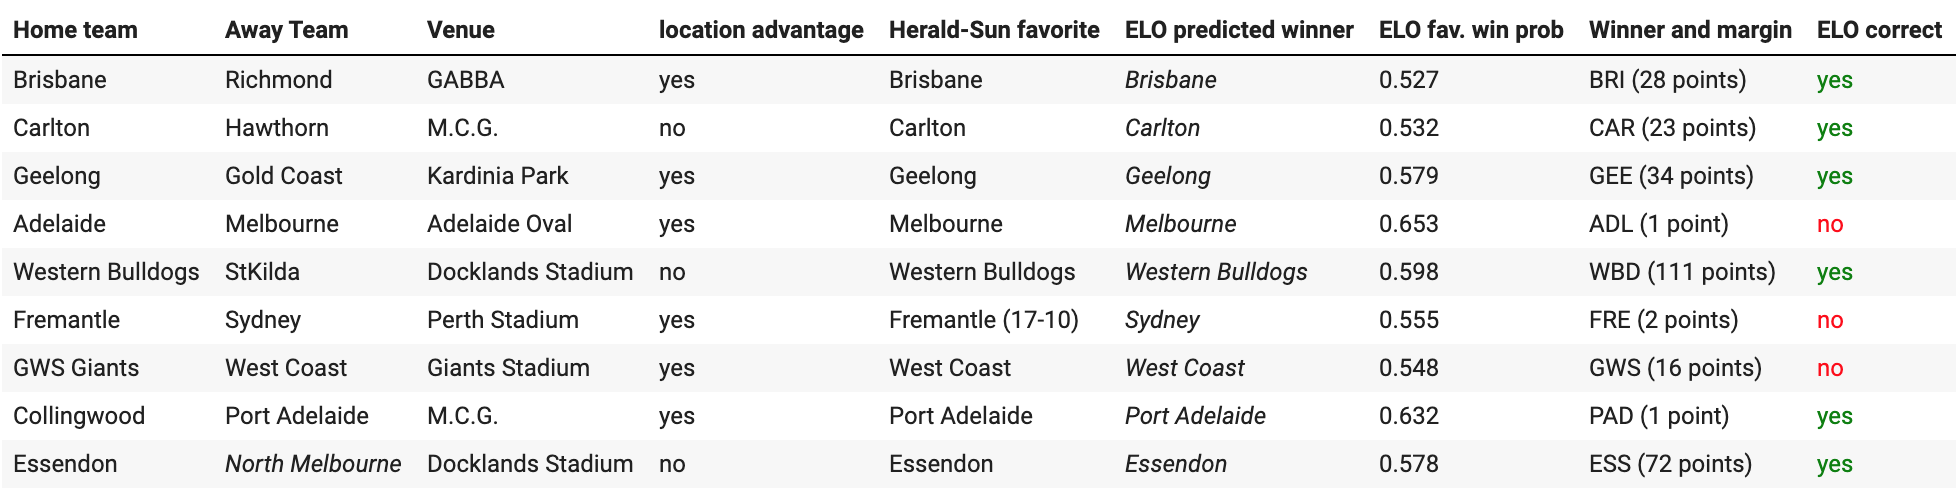

Of course this is a very small sample, but interesting to see that for Round 9 this basic ELO system scored 6/9 correctly. The three incorrect ELO predictions were all 'location advantage' games, where the lesser ranked home team won.

## **Week 11**

| Home team | Away Team | Venue |Favorite (Herald-Sun) | Location advantage |
| :--- | :--- | :--- | :--- | :--- |
|Western Bulldogs|Melbourne|Docklands Stadium|Western Bulldogs|no|
|Collingwood|Geelong|M.C.G.|Geelong|no|
|Brisbane|GWS Giants|Gabba|Brisbane|yes|
|St Kilda|North Melbourne|Docklands Stadium|St Kilda|no|
|Gold Coast|Hawthorn|S.C.G. (relocated)| Gold Coast|no|
|West Coast|Essendon|Perth Stadium|West Coast|yes|
|Richmond|Adelaide|Giants Stadium (relocated)|Richmond|no|
|Sydney|Carlton|S.C.G.|Sydney|yes|
|Port Adelaide|Fremantle|Adelaide Oval|Port Adelaide|yes|

In [123]:
## Need rating W10 (rating_n1 from joined) and win_prob W10 (win_prob from joined)
rframe = joined[['team','seq','win_prob','rating_n1']]

In [124]:
# Add the actuals (results from R10):
rframe['actual_n1'] = quick_results_check['actual']

In [125]:
# Update column names for current week
rframe.columns = ['team','seq','win_prob_n1','rating_n2','actual_n1']
# Generate new ratings
rframe['rating_n1'] = round(rframe['rating_n2'] + (20*(rframe['actual_n1'] - rframe['win_prob_n1'])),ndigits = 1)
rframe

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1
0,ADL,1,0.347,1469.2,0,1462.3
1,BRI,2,0.527,1531.4,1,1540.9
2,CAR,3,0.532,1475.1,0,1464.5
3,COL,4,0.368,1451.5,0,1444.1
4,ESS,5,0.578,1473.8,1,1482.2
5,FRE,6,0.445,1487.0,0,1478.1
6,GEE,7,0.579,1528.9,1,1537.3
7,GCS,8,0.421,1473.7,0,1465.3
8,GWS,9,0.452,1494.4,0,1485.4
9,HAW,10,0.468,1452.7,0,1443.3


In [126]:
contests = rframe
# Create opposition team rating column for R9:
contests['opp_team'] = ['RIC','GWS','SYD','GEE','WCE','PAD','COL','HAW','BRI','GCS','WBD','STK','FRE','ADL','NME','CAR','MEL','ESS']
contests.columns

Index(['team', 'seq', 'win_prob_n1', 'rating_n2', 'actual_n1', 'rating_n1',
       'opp_team'],
      dtype='object')

In [127]:
# create seperate lookup table which is a subset of contests:
lookup_vals = contests[['team','rating_n1']]
lookup_vals.columns = ['opp_team','rating_n1_opp']

In [128]:
joined = pd.merge(contests, 
                      lookup_vals, 
                      on ='opp_team', 
                      how ='left')

In [129]:
## Now the formula for win probability can be applied row by row:
joined['win_prob'] = round(1/(1 + (10**((joined['rating_n1_opp'] - joined['rating_n1'])/400))), ndigits = 3)
joined

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1,opp_team,rating_n1_opp,win_prob
0,ADL,1,0.347,1469.2,0,1462.3,RIC,1523.0,0.414
1,BRI,2,0.527,1531.4,1,1540.9,GWS,1485.4,0.579
2,CAR,3,0.532,1475.1,0,1464.5,SYD,1534.1,0.401
3,COL,4,0.368,1451.5,0,1444.1,GEE,1537.3,0.369
4,ESS,5,0.578,1473.8,1,1482.2,WCE,1536.7,0.422
5,FRE,6,0.445,1487.0,0,1478.1,PAD,1553.0,0.394
6,GEE,7,0.579,1528.9,1,1537.3,COL,1444.1,0.631
7,GCS,8,0.421,1473.7,0,1465.3,HAW,1443.3,0.532
8,GWS,9,0.452,1494.4,0,1485.4,BRI,1540.9,0.421
9,HAW,10,0.468,1452.7,0,1443.3,GCS,1465.3,0.468


| Home team | Away Team | Venue |Favorite (Herald-Sun) | Location advantage | ELO predicted winner | ELO fav. win prob| Winner & margin | ELO correct |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |:--- | :--- |
|Western Bulldogs|Melbourne|Docklands Stadium|Western Bulldogs|no| MEL | 0.524 |MEL (28)|<font color='green'>yes</font>|
|Collingwood|Geelong|M.C.G.|Geelong|no| GEE| 0.631 |GEE (10)|<font color='green'>yes</font>|
|Brisbane|GWS Giants|Gabba|Brisbane|yes| BRI |0.579 |BRI (64)|<font color='green'>yes</font>|
|St Kilda|North Melbourne|Docklands Stadium|St Kilda|no|STK | 0.603|STK (20)|<font color='green'>yes</font>|
|Gold Coast|Hawthorn|S.C.G. (relocated)| Gold Coast|no| GCS|0.532 |GCS (37)|<font color='green'>yes</font>|
|West Coast|Essendon|Perth Stadium|West Coast|yes|WCE | 0.578|ESS (16)|<font color='red'>no</font>|
|Richmond|Adelaide|Giants Stadium (relocated)|Richmond|no| RIC|0.586 |RIC (28)|<font color='green'>yes</font>|
|Sydney|Carlton|S.C.G.|Sydney|yes| SYD| 0.599|SYD (22)|<font color='green'>yes</font>|
|Port Adelaide|Fremantle|Adelaide Oval|Port Adelaide|yes|PAD | 0.606|PAD (46)|<font color='green'>yes</font>|

## **Week 12**

| Home team | Away Team | Venue |Favorite (Herald-Sun) | Location advantage |
| :--- | :--- | :--- | :--- | :--- |
|Melbourne|Brisbane|TBD|||
|StKilda|Sydney|TBD|||
|Adelaide|Collingwood|TBD|||
|Essendon|Richmons|TBD|||
|Gold Coast|Hawthorn|TBD|||
|West Coast|Essendon|TBD|||

In [130]:
## Need rating W11 (rating_n1 from joined) and win_prob W11 (win_prob from joined)
rframe = joined[['team','seq','win_prob','rating_n1']]

In [131]:
# Add the actuals (results from R11):
rframe['actual_n1'] = quick_results_check['actual']

In [132]:
# Update column names for current week
rframe.columns = ['team','seq','win_prob_n1','rating_n2','actual_n1']
# Generate new ratings
rframe['rating_n1'] = round(rframe['rating_n2'] + (20*(rframe['actual_n1'] - rframe['win_prob_n1'])),ndigits = 1)
rframe

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1
0,ADL,1,0.414,1462.3,0,1454.0
1,BRI,2,0.579,1540.9,1,1549.3
2,CAR,3,0.401,1464.5,0,1456.5
3,COL,4,0.369,1444.1,0,1436.7
4,ESS,5,0.422,1482.2,1,1493.8
5,FRE,6,0.394,1478.1,0,1470.2
6,GEE,7,0.631,1537.3,1,1544.7
7,GCS,8,0.532,1465.3,0,1454.7
8,GWS,9,0.421,1485.4,0,1477.0
9,HAW,10,0.468,1443.3,0,1433.9


In [133]:
contests = rframe
# Create opposition team rating column for R12 note some teams have a bye use 'BYE' instead of opposition name
contests['opp_team'] = ['COL','MEL','WCE','ADL','RIC','WBD','BYE','BYE','BYE','BYE','BNE','BYE','BYE','ESS','SYD','STK','FRE','CAR']
contests.columns

Index(['team', 'seq', 'win_prob_n1', 'rating_n2', 'actual_n1', 'rating_n1',
       'opp_team'],
      dtype='object')

In [134]:
contests

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1,opp_team
0,ADL,1,0.414,1462.3,0,1454.0,COL
1,BRI,2,0.579,1540.9,1,1549.3,MEL
2,CAR,3,0.401,1464.5,0,1456.5,WCE
3,COL,4,0.369,1444.1,0,1436.7,ADL
4,ESS,5,0.422,1482.2,1,1493.8,RIC
5,FRE,6,0.394,1478.1,0,1470.2,WBD
6,GEE,7,0.631,1537.3,1,1544.7,BYE
7,GCS,8,0.532,1465.3,0,1454.7,BYE
8,GWS,9,0.421,1485.4,0,1477.0,BYE
9,HAW,10,0.468,1443.3,0,1433.9,BYE


In [135]:
# create seperate lookup table which is a subset of contests:
lookup_vals = contests[['team','rating_n1']]
lookup_vals.columns = ['opp_team','rating_n1_opp']

In [136]:
lookup_vals

,opp_team,rating_n1_opp
0,ADL,1454.0
1,BRI,1549.3
2,CAR,1456.5
3,COL,1436.7
4,ESS,1493.8
5,FRE,1470.2
6,GEE,1544.7
7,GCS,1454.7
8,GWS,1477.0
9,HAW,1433.9


In [137]:
# Due to byes, joined may need to be created from inner join:
joined = pd.merge(contests, 
                      lookup_vals, 
                      on ='opp_team', 
                      how ='inner')

In [138]:
joined

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1,opp_team,rating_n1_opp
0,ADL,1,0.414,1462.3,0,1454.0,COL,1436.7
1,BRI,2,0.579,1540.9,1,1549.3,MEL,1595.4
2,CAR,3,0.401,1464.5,0,1456.5,WCE,1545.1
3,COL,4,0.369,1444.1,0,1436.7,ADL,1454.0
4,ESS,5,0.422,1482.2,1,1493.8,RIC,1531.3
5,FRE,6,0.394,1478.1,0,1470.2,WBD,1579.6
6,RIC,14,0.586,1523.0,1,1531.3,ESS,1493.8
7,STK,15,0.603,1483.8,0,1471.7,SYD,1542.1
8,SYD,16,0.599,1534.1,1,1542.1,STK,1471.7
9,WBD,17,0.476,1569.1,1,1579.6,FRE,1470.2


In [144]:
# Need a version of joined for bye teams (for later) including the columns team, rating_n2, rating_n1, opp_team (BYE), rating_n1_opp (0):
# Create contests_bye:
contests_bye =  contests[contests['opp_team']=='BYE']

In [145]:
contests_bye

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1,opp_team
6,GEE,7,0.631,1537.3,1,1544.7,BYE
7,GCS,8,0.532,1465.3,0,1454.7,BYE
8,GWS,9,0.421,1485.4,0,1477.0,BYE
9,HAW,10,0.468,1443.3,0,1433.9,BYE
11,NME,12,0.397,1411.0,0,1403.1,BYE
12,PAD,13,0.606,1553.0,1,1560.9,BYE


In [146]:
contests_bye['rating_n1_opp'] = 0
contests_bye

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1,opp_team,rating_n1_opp
6,GEE,7,0.631,1537.3,1,1544.7,BYE,0
7,GCS,8,0.532,1465.3,0,1454.7,BYE,0
8,GWS,9,0.421,1485.4,0,1477.0,BYE,0
9,HAW,10,0.468,1443.3,0,1433.9,BYE,0
11,NME,12,0.397,1411.0,0,1403.1,BYE,0
12,PAD,13,0.606,1553.0,1,1560.9,BYE,0


In [147]:
joined_bye = contests_bye

In [148]:
## Now the formula for win probability can be applied row by row:
joined['win_prob'] = round(1/(1 + (10**((joined['rating_n1_opp'] - joined['rating_n1'])/400))), ndigits = 3)
joined

,team,seq,win_prob_n1,rating_n2,actual_n1,rating_n1,opp_team,rating_n1_opp,win_prob
0,ADL,1,0.414,1462.3,0,1454.0,COL,1436.7,0.525
1,BRI,2,0.579,1540.9,1,1549.3,MEL,1595.4,0.434
2,CAR,3,0.401,1464.5,0,1456.5,WCE,1545.1,0.375
3,COL,4,0.369,1444.1,0,1436.7,ADL,1454.0,0.475
4,ESS,5,0.422,1482.2,1,1493.8,RIC,1531.3,0.446
5,FRE,6,0.394,1478.1,0,1470.2,WBD,1579.6,0.348
6,RIC,14,0.586,1523.0,1,1531.3,ESS,1493.8,0.554
7,STK,15,0.603,1483.8,0,1471.7,SYD,1542.1,0.400
8,SYD,16,0.599,1534.1,1,1542.1,STK,1471.7,0.600
9,WBD,17,0.476,1569.1,1,1579.6,FRE,1470.2,0.652
